<a href="https://colab.research.google.com/github/Sachithra-Priyadarshana/Sachithra/blob/main/218979H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Student - BSNN Priyadarshana

Index -218979H

EE5075 - Artificial Intelligence Applications

Assignment -Lecture 5

In [3]:
#importing important libraries 
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import cifar10
import PIL
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow import keras

In [4]:
# loading in the data    
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [5]:
print('Size of train data {}'.format(X_train.shape))
print('Size of test data {}'.format(X_test.shape))

Size of train data (50000, 32, 32, 3)
Size of test data (10000, 32, 32, 3)


In [6]:
print('Size of train class {}'.format(y_train.shape))
print('Size of test class {}'.format(y_test.shape))

Size of train class (50000, 1)
Size of test class (10000, 1)


In [7]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
num_classes = len(np.unique(y_train))

In [8]:
print('Total class {}'.format(num_classes))

Total class 10


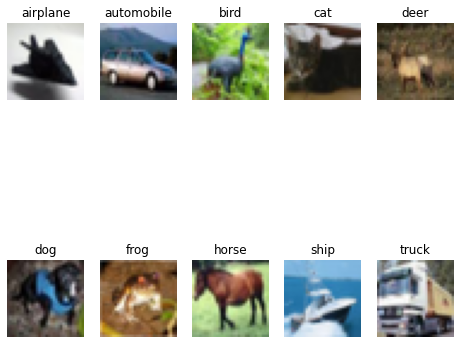

In [9]:
#plotting first image of all 10 classes from train data
plt.figure(figsize=(8, 8))
for i in range(num_classes):
    ax = plt.subplot(2, 5, i + 1)
    idx = np.where(y_train[:]==i)[0]
    features_idx = X_train[idx,::]
    plt.imshow(features_idx[0])
    ax.set_title(class_names[i])
    plt.axis("off")

In [10]:
# normalize the inputs from 0-255 to between 0 and 1 by dividing by 255   
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [12]:
model = Sequential([
  layers.Conv2D(32, (3,3),input_shape=X_train.shape[1:], padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [15]:
seed = 21
np.random.seed(seed)
epochs=10
batch_size = 32
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size= batch_size)

Epoch 1/10
1563/1563 [==============================] - 16s 5ms/step - loss: 1.4268 - accuracy: 0.4817 - val_loss: 1.1235 - val_accuracy: 0.6031
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0316 - accuracy: 0.6327 - val_loss: 0.9388 - val_accuracy: 0.6652
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8820 - accuracy: 0.6910 - val_loss: 0.8650 - val_accuracy: 0.6992
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7790 - accuracy: 0.7281 - val_loss: 0.7928 - val_accuracy: 0.7275
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7017 - accuracy: 0.7541 - val_loss: 0.7490 - val_accuracy: 0.7433
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6364 - accuracy: 0.7758 - val_loss: 0.7580 - val_accuracy: 0.7416
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5736 - accuracy: 0.7984 - val_loss: 0.7412 - val_accuracy

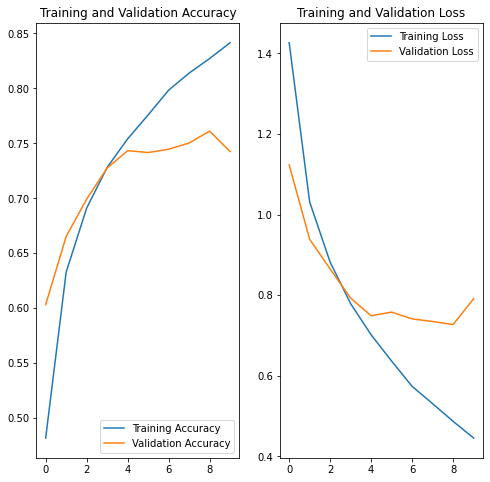

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
img_height=32
img_width=32

1/1 [==============================] - 0s 236ms/step
this image most likely belongs todog with 23.20 percent confidence.
Image after resizing to 32*32


(-0.5, 31.5, 31.5, -0.5)

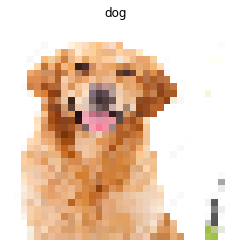

In [24]:
from keras.utils.image_utils import img_to_array
dog_url="https://thumbs.dreamstime.com/z/golden-retriever-dog-sitting-isolated-white-24750809.jpg"
dog_path=tf.keras.utils.get_file('',origin=dog_url)
img=keras.preprocessing.image.load_img(dog_path,target_size=(img_height,img_width))
img_array=keras.preprocessing.image.img_to_array(img)
img_array=tf.expand_dims(img_array,0)

predictions=model.predict(img_array)
score=tf.nn.softmax(predictions[0])
print(
  "this image most likely belongs to{} with {:.2f} percent confidence."
  .format(class_names[np.argmax(score)],100*np.max(score))
)
print('Image after resizing to 32*32')
px=plt.subplot()
plt.imshow(img)
px.set_title(class_names[np.argmax(score)])
plt.axis("off")

            


1/1 [==============================] - 0s 16ms/step
this image most likely belongs tohorse with 23.20 percent confidence.
Image after resizing to 32*32


(-0.5, 31.5, 31.5, -0.5)

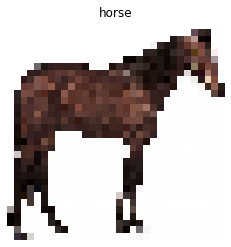

In [25]:
# Predicting if the image is horse or Not

from keras.utils.image_utils import img_to_array

horse_url="https://cdn.britannica.com/96/1296-050-4A65097D/gelding-bay-coat.jpg"
horse_path=tf.keras.utils.get_file('',origin=horse_url)
img=keras.preprocessing.image.load_img(horse_path,target_size=(img_height,img_width))
img_array=keras.preprocessing.image.img_to_array(img)
img_array=tf.expand_dims(img_array,0)

predictions=model.predict(img_array)
score=tf.nn.softmax(predictions[0])
print(
  "this image most likely belongs to{} with {:.2f} percent confidence."
  .format(class_names[np.argmax(score)],100*np.max(score))
)
print('Image after resizing to 32*32')
px=plt.subplot()
plt.imshow(img)
px.set_title(class_names[np.argmax(score)])
plt.axis("off")

BSNN Priyadarshana
218979H